<a href="https://colab.research.google.com/github/pongsapaks/Detection-depression/blob/main/Fusion_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

TensorFlow 2.15.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 0 GPU(s):


In [4]:
text_prediction = pd.read_csv("/content/drive/MyDrive/Final_DLP/Text_pred.csv")

audio_prediction = pd.read_csv("/content/drive/MyDrive/Final_DLP/Audio_pred.csv")

Y_test = pd.read_csv("/content/drive/MyDrive/Final_DLP/y_true.csv")

In [6]:
# Assuming you have predictions from both text and audio models
text_model_predictions = text_prediction.values  #convert to numpy array
audio_model_predictions = audio_prediction.values  #convert to numpy array

# Concatenate the predictions as features
combined_features = np.concatenate((text_model_predictions, audio_model_predictions), axis=1)
combined_features

array([[0.64752   , 0.35248   , 0.55555555],
       [0.54360217, 0.45639777, 0.55555555],
       [0.73083013, 0.26916987, 0.55555555],
       [0.8544312 , 0.14556885, 0.55555555],
       [0.8293913 , 0.17060868, 0.55555555],
       [0.9491926 , 0.05080745, 0.55555555],
       [0.91480875, 0.08519124, 0.55555555],
       [0.7581583 , 0.24184172, 0.55555555],
       [0.8457811 , 0.15421896, 0.55555555],
       [0.86520404, 0.13479602, 0.55555555],
       [0.4977059 , 0.50229406, 0.55555555],
       [0.98223245, 0.01776756, 0.55555555],
       [0.37484518, 0.6251548 , 0.55555555],
       [0.8723323 , 0.1276677 , 0.55555555],
       [0.97781265, 0.0221873 , 0.55555555],
       [0.6770012 , 0.32299885, 0.55555555],
       [0.8795489 , 0.12045111, 0.55555555],
       [0.4866108 , 0.51338917, 0.55555555],
       [0.94370085, 0.05629917, 0.55555555],
       [0.93224853, 0.0677515 , 0.55555555],
       [0.5543719 , 0.44562814, 0.55555555],
       [0.29319954, 0.70680046, 0.55555555],
       [0.

In [8]:
Y_true = Y_test.values  #convert to numpy array

# Define a simple perceptron model
model = Sequential()
model.add(Dense(1, input_dim=3, activation='sigmoid'))  # 4 input features (2 from text, 2 from audio)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(combined_features, Y_true, epochs=100, verbose=1)

# Make predictions using the combined features
final_predictions = model.predict(combined_features)

# Convert the final predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
final_binary_predictions = (final_predictions > 0.5).astype(int)

print("Final Binary Predictions:", final_binary_predictions.flatten())


Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 0.7404 - accuracy: 0.5217
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7395 - accuracy: 0.5217
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7386 - accuracy: 0.5217
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7378 - accuracy: 0.5217
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.7369 - accuracy: 0.5435
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7361 - accuracy: 0.5435
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.7352 - accuracy: 0.5435
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7345 - accuracy: 0.5435
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 0.7336 - accuracy: 0.5435
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7327 - accuracy: 0.5435
Epoch 11/100
2/2 [==========

In [9]:
from sklearn.metrics import accuracy_score,classification_report,  ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
accuracy_score(Y_true, final_binary_predictions)

0.6086956521739131

In [11]:
print(classification_report(Y_true, final_binary_predictions))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        32
           1       0.17      0.07      0.10        14

    accuracy                           0.61        46
   macro avg       0.42      0.46      0.42        46
weighted avg       0.52      0.61      0.55        46



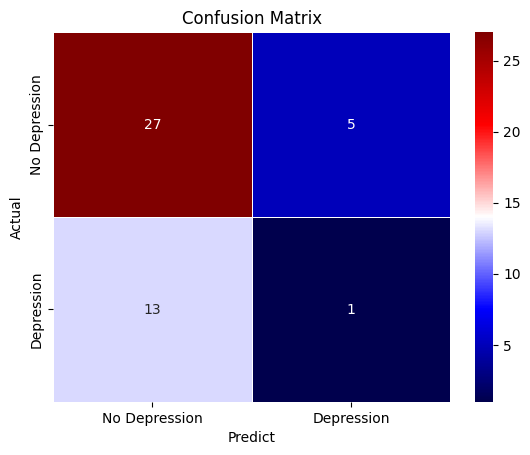

In [12]:
y_true_label = ['No Depression' , 'Depression']
y_pred_label = ['No Depression' , 'Depression']
cm = confusion_matrix(Y_true, final_binary_predictions)
ax = sns.heatmap(cm, annot = True, cmap = 'seismic',xticklabels = y_pred_label, yticklabels = y_true_label, linewidth=.5, )
ax.set(xlabel='Predict',ylabel='Actual')
plt.title('Confusion Matrix')
plt.show()